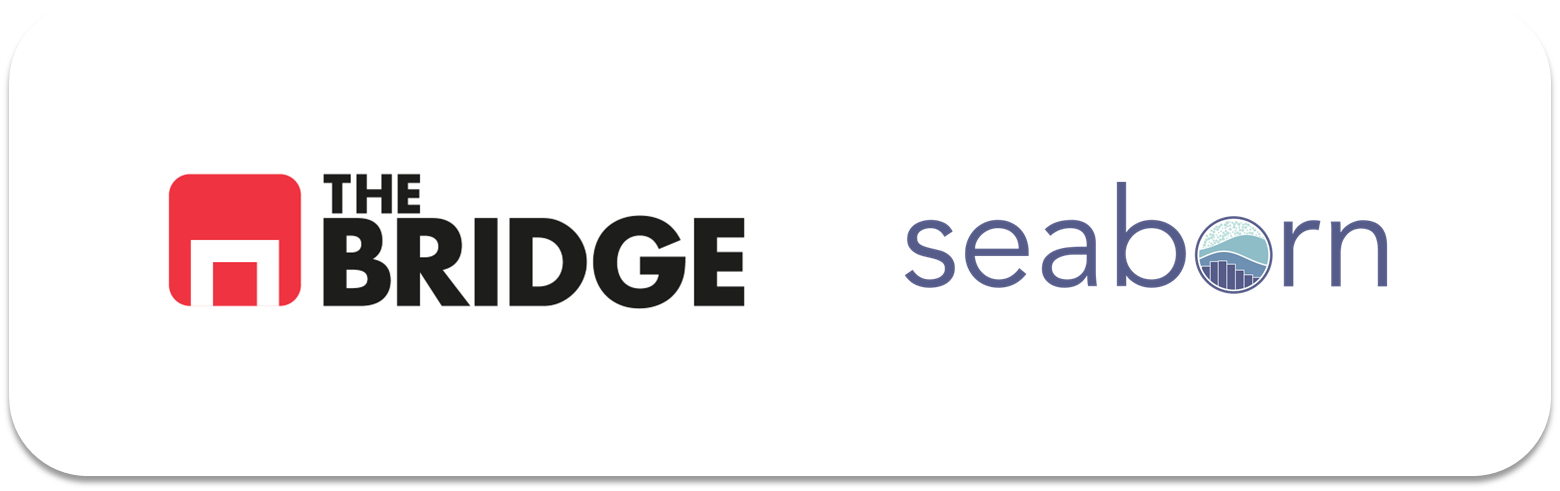

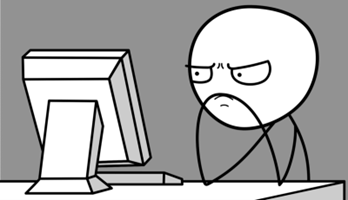

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [2]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_titanic = pd.read_csv("./data/titanic.csv")
df_bitcoin = pd.read_csv("./data/BTC.csv")

In [3]:
df_bitcoin["fechas"] = pd.to_datetime(df_bitcoin["date"])
df_bitcoin.set_index("fechas", inplace = True)
df_bitcoin.drop("date", axis = 1, inplace= True)
df_bitcoin.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
fechas,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [21]:
def dibujar_frecuencias(df, columns):
    # Calcular el número de filas necesarias (2 columnas por fila)
    
    num_filas = math.ceil(len(columns)/ 2)  # Redondear hacia arriba si hay columnas impares
    
    # Crear la figura y las subgráficas
    fig, axes = plt.subplots(num_filas, 2, figsize=(12, 5 * num_filas))  # Tamaño ajustable
    axes = axes.flatten()  # Aplanar el arreglo de subgráficas para iterar fácilmente
    
    # Graficar cada columna categórica
    for i, column in enumerate(columns):
        ax = axes[i]

        freq = df[column].value_counts()

        sns.barplot(x = freq.index, y=freq.values, ax=ax)

        ax.set_title(f"Frecuencias absolutas de {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Frecuencias")
    
    # Ocultar las subgráficas no utilizadas
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
        
    
    # Ajustar diseño general
    plt.tight_layout()
    plt.show()


### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


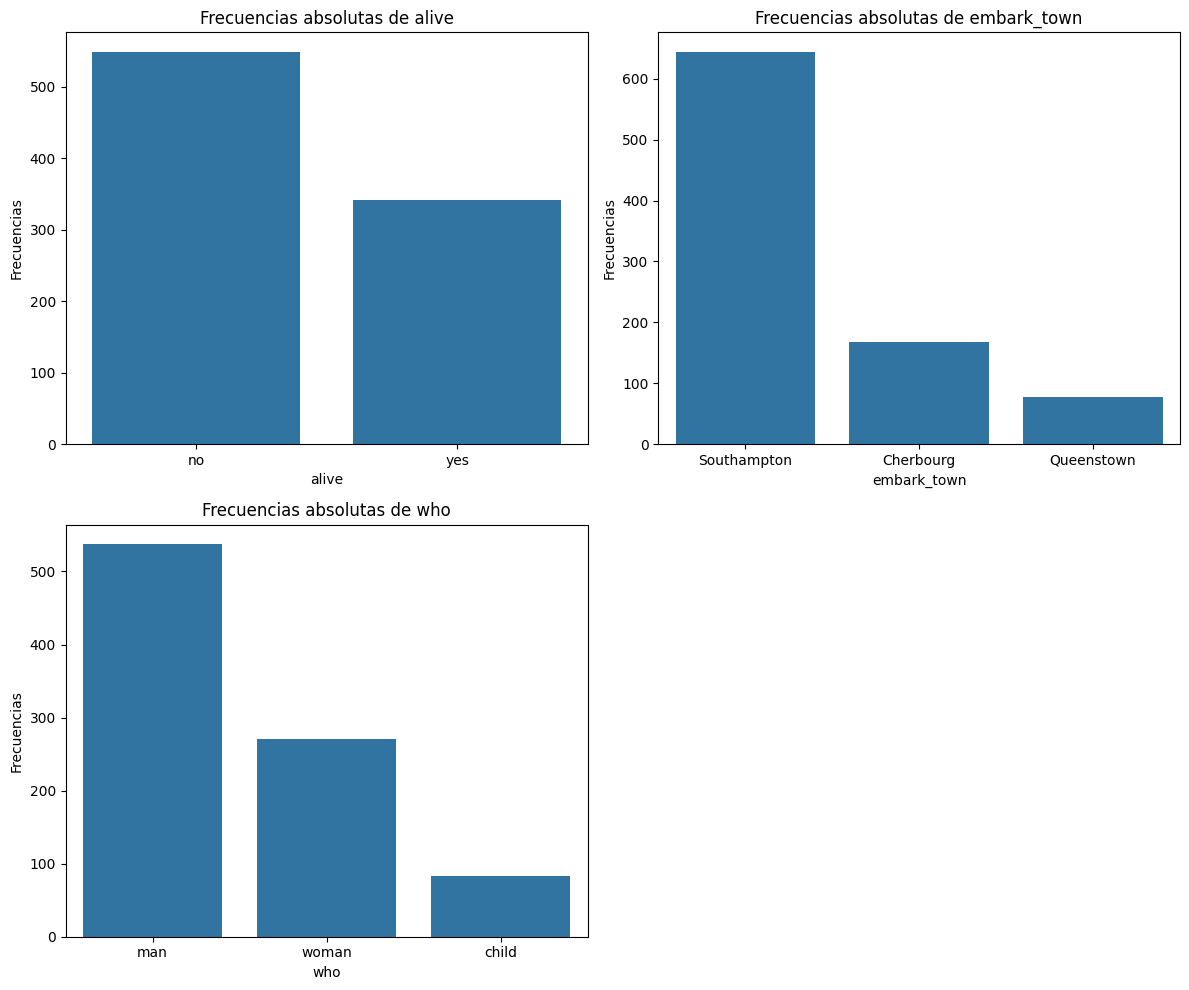

In [22]:
# Columnas a graficar
columns_to_plot = ['alive', 'embark_town', 'who']

# Llamada a la función con df_titanic y las columnas especificadas
dibujar_frecuencias(df_titanic, columns_to_plot)

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [24]:
def dibujar_histogramas_con_bins(df, columns, bins_list, incluir_densidad=False):
    """
    Genera histogramas para columnas numéricas de un dataframe con múltiples bins.
    
    Args:
        df (DataFrame): DataFrame con los datos.
        columns (list): Lista de nombres de columnas numéricas a graficar.
        bins_list (list): Lista con diferentes números de bins para los histogramas.
        incluir_densidad (bool): Si se incluye o no la función de densidad (opcional, por defecto False).
    """
    # Calcular el número de subgráficas requeridas
    num_graficos = len(columns) * len(bins_list)
    num_filas = math.ceil(num_graficos / 2)  # Máximo 2 columnas por fila

    # Crear figura y subgráficas
    fig, axes = plt.subplots(num_filas, 2, figsize=(12, 5 * num_filas))
    axes = axes.flatten()  # Aplanar para acceso sencillo

    # Graficar histogramas
    grafico_index = 0  # Índice para acceder a las subgráficas
    for column in columns:
        for bins in bins_list:
            ax = axes[grafico_index]
            # Crear histograma con seaborn
            sns.histplot(df[column], bins=bins, kde=incluir_densidad, ax=ax)
            # Añadir título y etiquetas
            ax.set_title(f"Histograma de {column} con {bins} bins")
            ax.set_xlabel(column)
            ax.set_ylabel("Frecuencia")
            grafico_index += 1

    # Eliminar subgráficas no utilizadas
    for j in range(grafico_index, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar diseño
    plt.tight_layout()
    plt.show()

### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

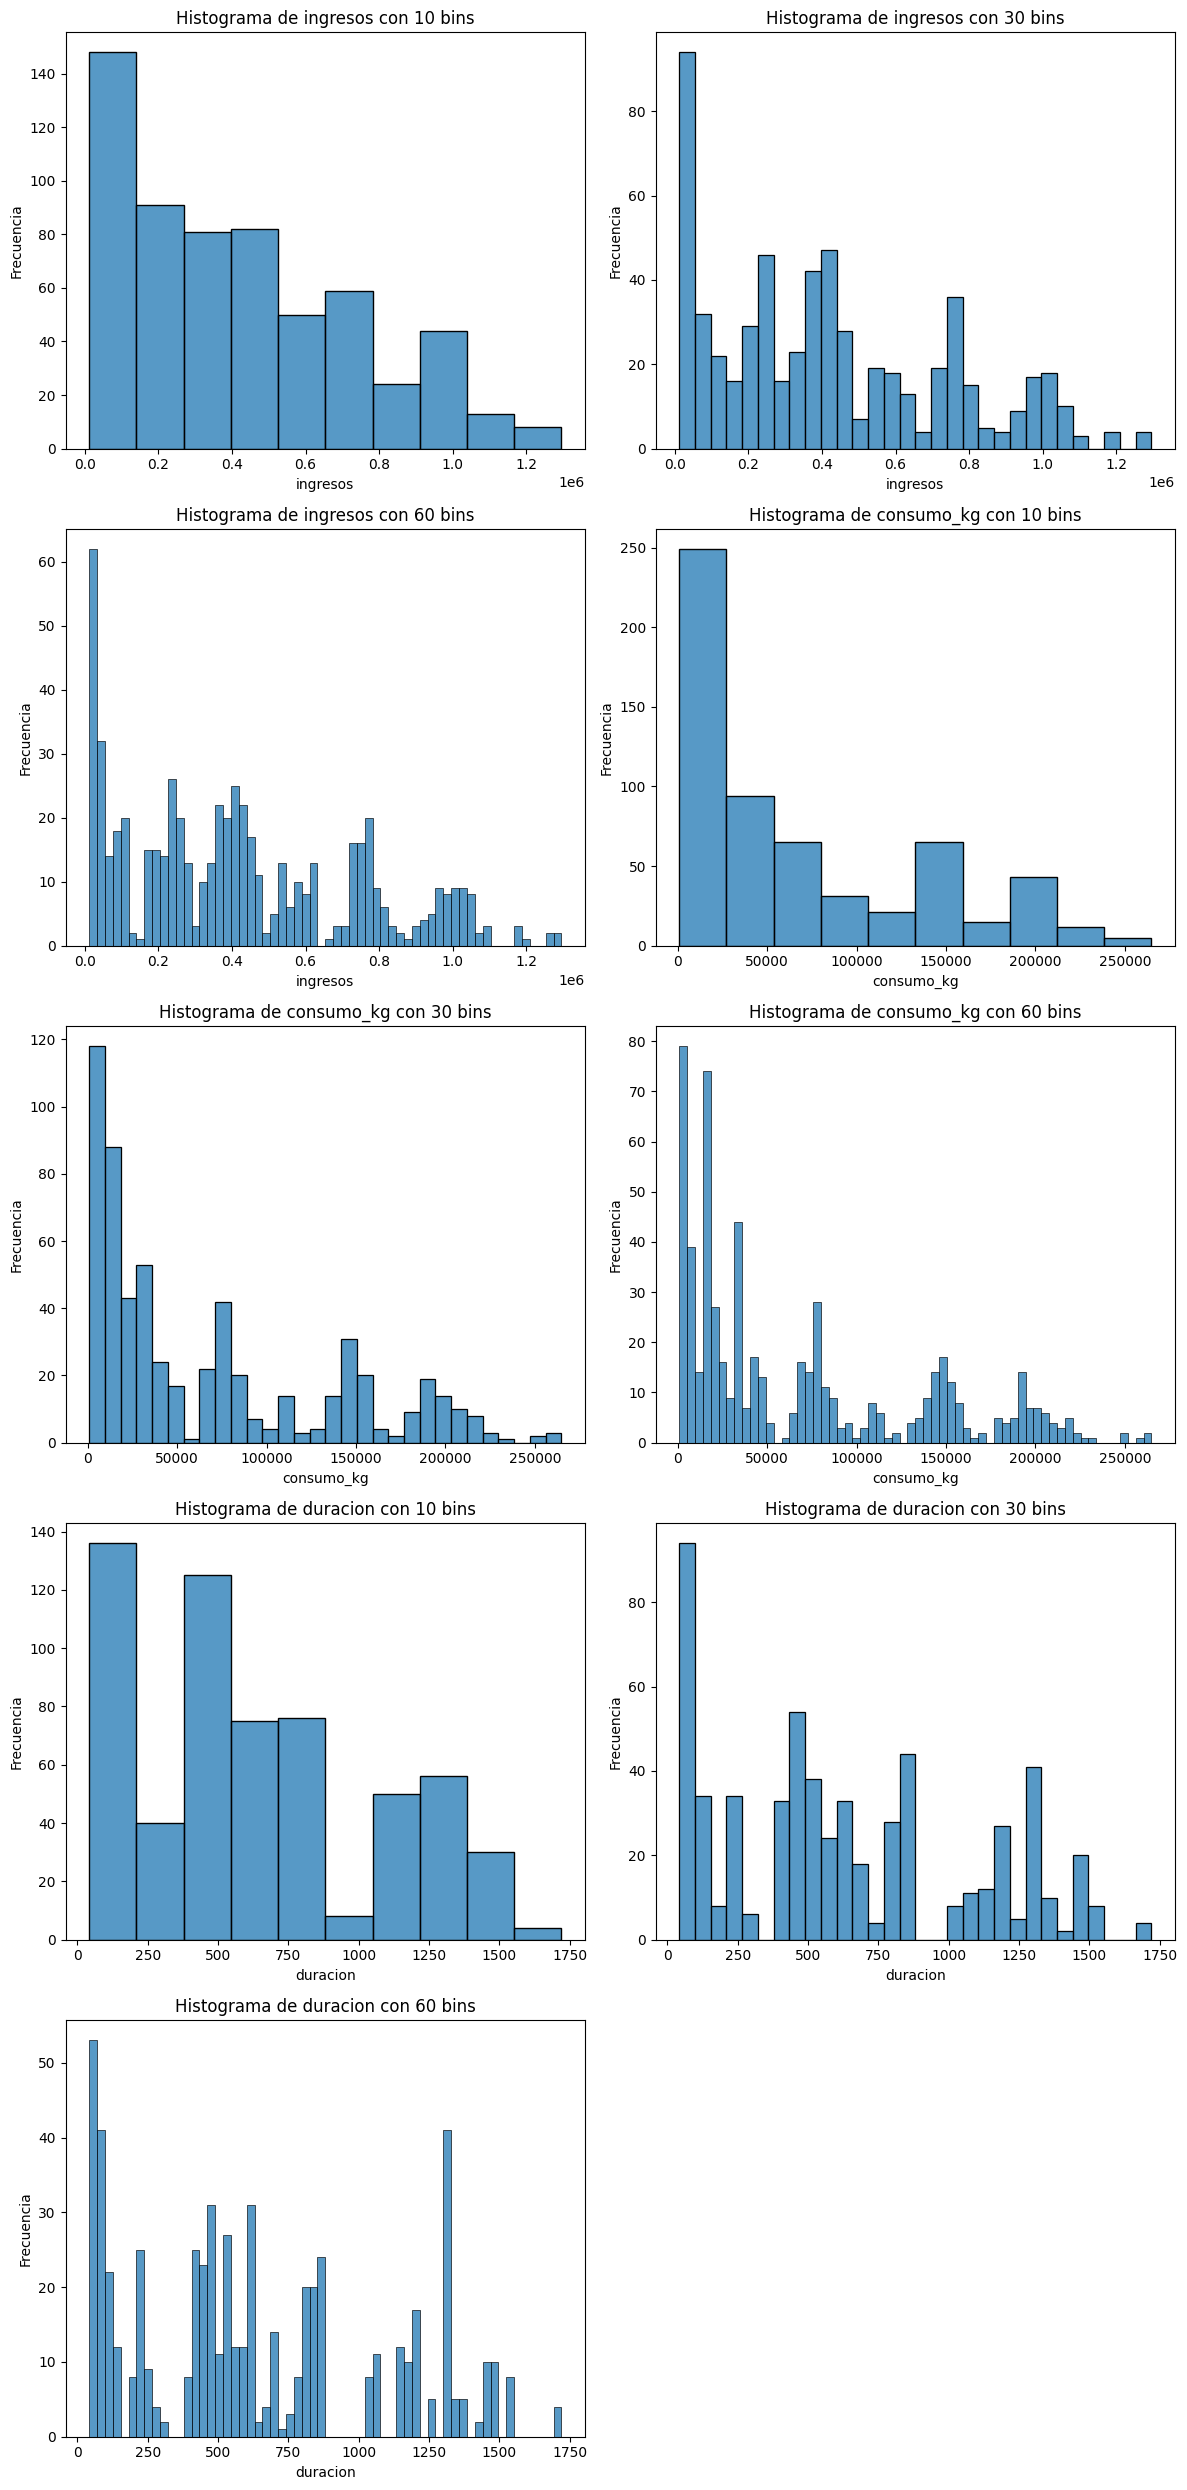

In [25]:
# Columnas y lista de bins
columns_to_plot = ['ingresos', 'consumo_kg', 'duracion']
bins_list = [10, 30, 60]

# Llamar a la función
dibujar_histogramas_con_bins(df_viajes, columns_to_plot, bins_list, incluir_densidad=False)

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [26]:
def graficar_series_temporales(df, columns):
    """
    Genera gráficas para series temporales o secuencias a partir de columnas numéricas de un dataframe.
    
    Args:
        df (DataFrame): DataFrame con los datos.
        columns (list): Lista de nombres de columnas numéricas a graficar.
    """
    # Calcular el número de filas necesarias (máximo 2 columnas por fila)
    num_filas = math.ceil(len(columns) / 2)
    
    # Crear la figura y las subgráficas
    fig, axes = plt.subplots(num_filas, 2, figsize=(12, 5 * num_filas))  # Tamaño ajustable
    axes = axes.flatten()  # Aplanar el arreglo de subgráficas para iterar fácilmente
    
    # Graficar cada columna numérica
    for i, column in enumerate(columns):
        ax = axes[i]
        ax.plot(df[column], label=column, color='blue', linewidth=1)
        
        # Añadir título y etiquetas
        ax.set_title(f"Serie temporal de {column}")
        ax.set_xlabel("Índice")
        ax.set_ylabel("Valores")
        ax.legend()
    
    # Ocultar subgráficas no utilizadas si el número de columnas es impar
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    # Ajustar el diseño general
    plt.tight_layout()
    plt.show()


### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

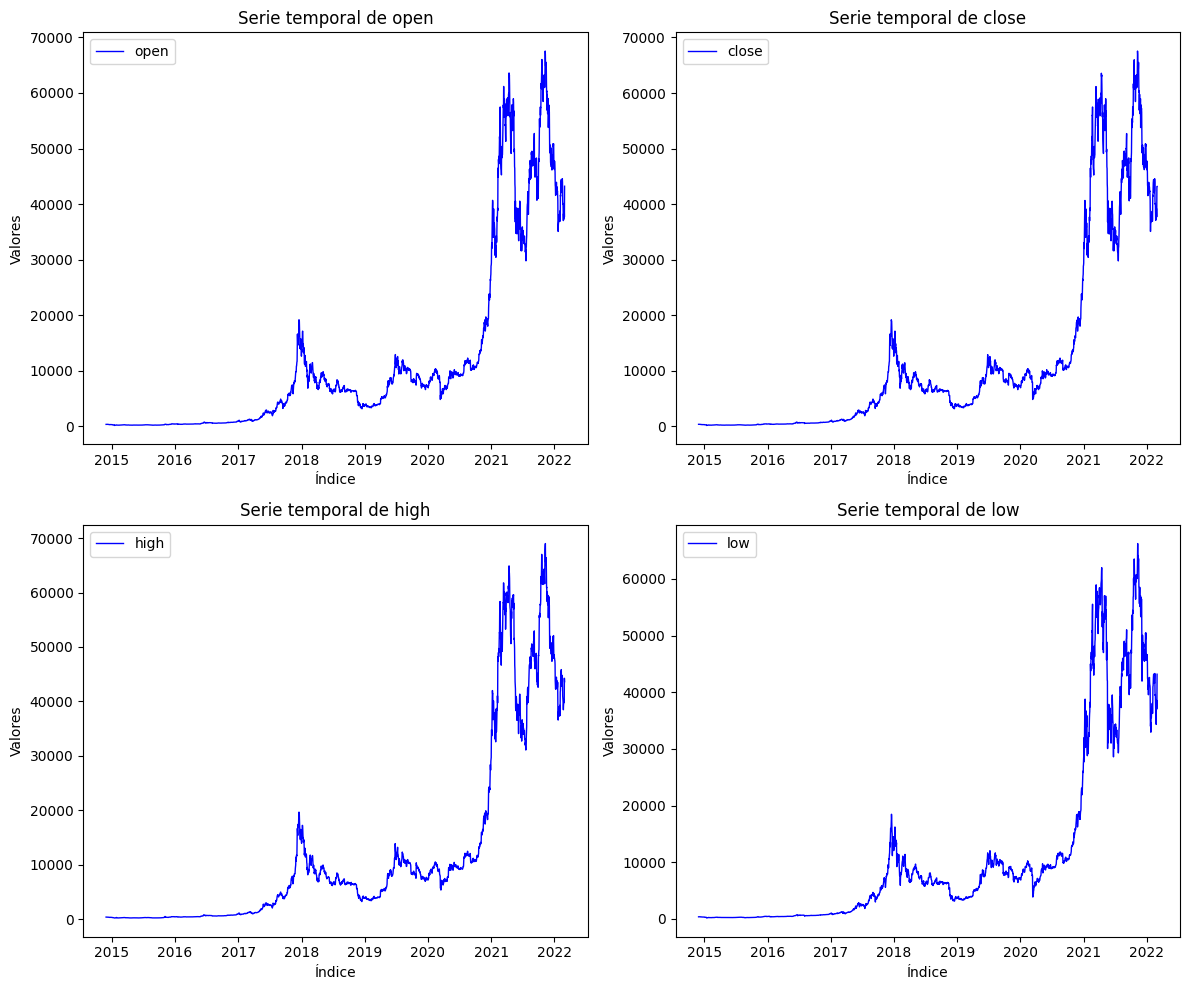

In [27]:
# Columnas a graficar
columns_to_plot = ['open', 'close', 'high', 'low']

# Llamada a la función
graficar_series_temporales(df_bitcoin, columns_to_plot)


### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [28]:
def graficar_series_temporales(df, columns, pintar_todo_junto=False, start_date=None, end_date=None):
    """
    Genera gráficas para series temporales o secuencias a partir de columnas numéricas de un dataframe.
    
    Args:
        df (DataFrame): DataFrame con los datos.
        columns (list): Lista de nombres de columnas numéricas a graficar.
        pintar_todo_junto (bool): Si es True, todas las series se pintan en una sola gráfica.
        start_date (str): Fecha de inicio (opcional) en formato 'YYYY-MM-DD'.
        end_date (str): Fecha de fin (opcional) en formato 'YYYY-MM-DD'.
    """
    # Filtrar datos por rango de fechas si se proporcionan
    if start_date is not None:
        df = df[df.index >= start_date]
    if end_date is not None:
        df = df[df.index <= end_date]
    
    if pintar_todo_junto:
        # Graficar todas las series en una sola gráfica
        plt.figure(figsize=(12, 6))
        for column in columns:
            sns.lineplot(x=df.index, y=df[column], label=column)
        plt.title("Evolución de las series temporales")
        plt.xlabel("Fecha")
        plt.ylabel("Valores")
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        # Calcular el número de filas necesarias (máximo 2 columnas por fila)
        num_filas = math.ceil(len(columns) / 2)
        
        # Crear la figura y las subgráficas
        fig, axes = plt.subplots(num_filas, 2, figsize=(12, 5 * num_filas))  # Tamaño ajustable
        axes = axes.flatten()  # Aplanar el arreglo de subgráficas para iterar fácilmente
        
        # Graficar cada columna numérica
        for i, column in enumerate(columns):
            ax = axes[i]
            sns.lineplot(x=df.index, y=df[column], ax=ax)
            ax.set_title(f"Serie temporal de {column}")
            ax.set_xlabel("Fecha")
            ax.set_ylabel("Valores")
        
        # Ocultar subgráficas no utilizadas si el número de columnas es impar
        for j in range(len(columns), len(axes)):
            fig.delaxes(axes[j])
        
        # Ajustar el diseño general
        plt.tight_layout()
        plt.show()


### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.

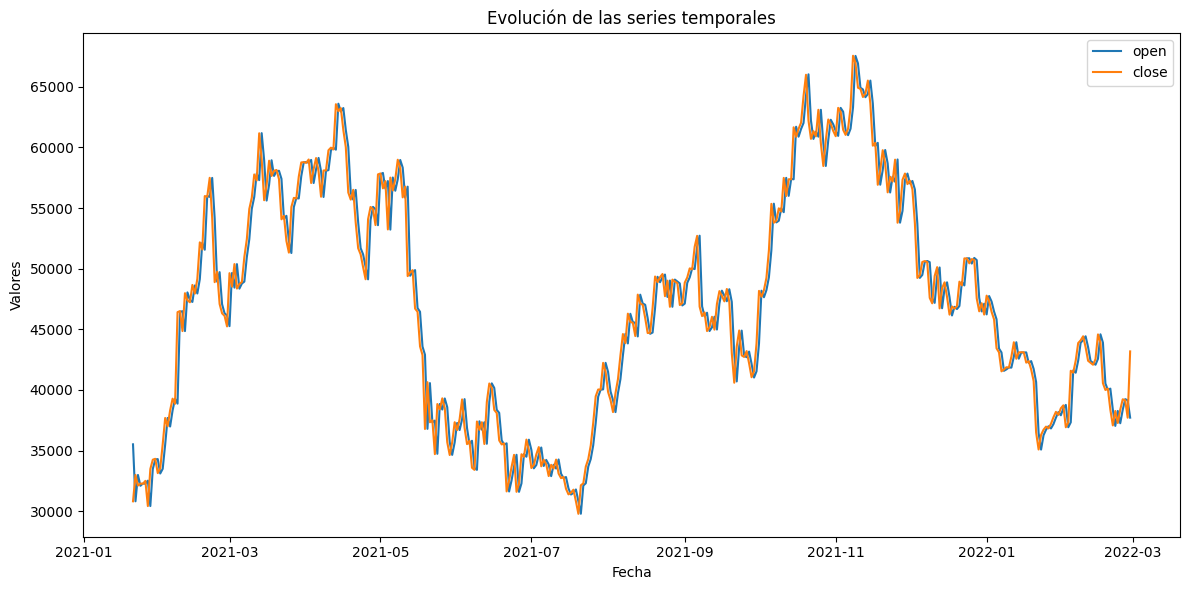

In [29]:

# Paso 1: Calcular la diferencia entre 'open' y 'close'
df_bitcoin['variacion'] = abs(df_bitcoin['open'] - df_bitcoin['close'])

# Paso 2: Ordenar por mayor variación
periodo_interesante = df_bitcoin.sort_values(by='variacion', ascending=False).iloc[:30].index  # Seleccionar 30 días con mayor variación
start_date = periodo_interesante.min()  # Fecha inicial del periodo interesante
end_date = periodo_interesante.max()    # Fecha final del periodo interesante

# Paso 3: Graficar el periodo más interesante
graficar_series_temporales(
    df_bitcoin, 
    ['open', 'close'], 
    pintar_todo_junto=True, 
    start_date=start_date, 
    end_date=end_date
)